## House Prediction model

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mlub2021-session1/sampleSubmission.csv
/kaggle/input/mlub2021-session1/train_set.csv
/kaggle/input/mlub2021-session1/test_set.csv/test_set.csv


In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

# Settings for the visualizations
import seaborn as sns
print(sns.__version__)
assert sns.__version__ >= "0.10"
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

import pandas as pd
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 50)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

0.11.2


In [3]:
train_set = pd.read_csv('/kaggle/input/mlub2021-session1/train_set.csv',index_col=0) 
test_set = pd.read_csv('/kaggle/input/mlub2021-session1/test_set.csv/test_set.csv',index_col=0) 

## DATA ANALYSIS

First we need to explore our data, in order to get deep understanding about it and to know how we can use it properly to succed on predicting house prices.

In [4]:
# to make this notebook's output identical at every run
np.random.seed(120)
random_seed = 120

In [5]:
# print the dataset size
print("There is", train_set.shape[0], "samples in the train set")
print("Each sample has", train_set.shape[1], "features in the train set")

There is 5432 samples in the train set
Each sample has 21 features in the train set


In [6]:
#See all the rows and its data format 
train_set.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,NaN,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,NaN,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,NaN,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0


In [7]:
#All non-categorical features
train_set.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,5432.000000,5.432000e+03,5432.000000,5432.000000,5432.000000,5432.000000,5407.000000,5432.000000,2890.000000,3302.000000,5432.000000,5432.000000,5432.000000
mean,2.937224,1.078470e+06,10.220692,3106.552835,2.917342,1.538660,1.630109,537.054676,163.462430,1965.219564,-37.809664,144.995491,7438.537555
std,0.951947,6.470654e+05,5.996967,95.185290,0.988414,0.704286,0.982855,1550.867601,843.189116,36.244398,0.079365,0.106382,4368.906756
min,1.000000,1.450000e+05,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1830.000000,-38.174880,144.542370,389.000000
25%,2.000000,6.500000e+05,6.200000,3046.000000,2.000000,1.000000,1.000000,182.750000,92.000000,1940.000000,-37.856648,144.930800,4294.000000
50%,3.000000,9.015000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,450.000000,125.000000,1970.000000,-37.802635,145.000250,6543.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,654.250000,174.750000,1999.000000,-37.757238,145.059225,10331.000000
max,8.000000,8.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,75100.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [8]:
# we can see the type of each features as follows
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5432 entries, 0 to 5431
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         5432 non-null   object 
 1   Address        5432 non-null   object 
 2   Rooms          5432 non-null   int64  
 3   Type           5432 non-null   object 
 4   Price          5432 non-null   float64
 5   Method         5432 non-null   object 
 6   SellerG        5432 non-null   object 
 7   Date           5432 non-null   object 
 8   Distance       5432 non-null   float64
 9   Postcode       5432 non-null   float64
 10  Bedroom2       5432 non-null   float64
 11  Bathroom       5432 non-null   float64
 12  Car            5407 non-null   float64
 13  Landsize       5432 non-null   float64
 14  BuildingArea   2890 non-null   float64
 15  YearBuilt      3302 non-null   float64
 16  CouncilArea    4879 non-null   object 
 17  Lattitude      5432 non-null   float64
 18  Longtitu

In [9]:
## POSTCODE IS NOT NUMERIC, we should change it to categorica
train_set['Postcode'] = pd.Categorical(train_set.Postcode)
train_set.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,5432.000000,5.432000e+03,5432.000000,5432.000000,5432.000000,5407.000000,5432.000000,2890.000000,3302.000000,5432.000000,5432.000000,5432.000000
mean,2.937224,1.078470e+06,10.220692,2.917342,1.538660,1.630109,537.054676,163.462430,1965.219564,-37.809664,144.995491,7438.537555
std,0.951947,6.470654e+05,5.996967,0.988414,0.704286,0.982855,1550.867601,843.189116,36.244398,0.079365,0.106382,4368.906756
min,1.000000,1.450000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1830.000000,-38.174880,144.542370,389.000000
25%,2.000000,6.500000e+05,6.200000,2.000000,1.000000,1.000000,182.750000,92.000000,1940.000000,-37.856648,144.930800,4294.000000
50%,3.000000,9.015000e+05,9.200000,3.000000,1.000000,2.000000,450.000000,125.000000,1970.000000,-37.802635,145.000250,6543.000000
75%,3.000000,1.330000e+06,13.000000,3.000000,2.000000,2.000000,654.250000,174.750000,1999.000000,-37.757238,145.059225,10331.000000
max,8.000000,8.000000e+06,48.100000,20.000000,8.000000,10.000000,75100.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


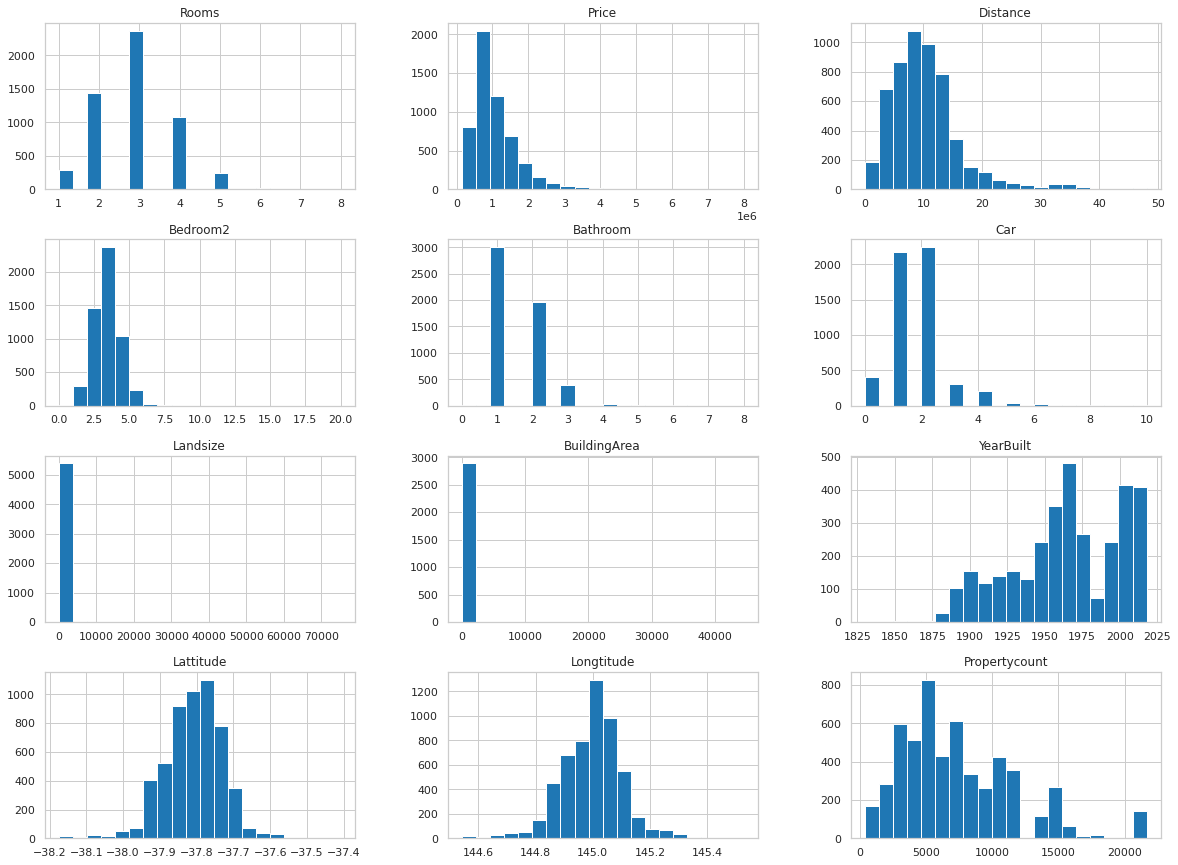

In [10]:
#Observe data and its distribution 
train_set.hist(bins=20, figsize=(20,15))
plt.show()

We observe that Landsize and Building Area have few outliers and data is all in one end. 

[]

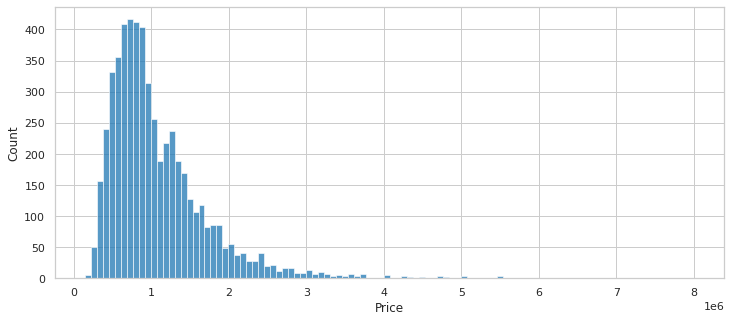

In [11]:
#Prices histogram
sns.histplot(train_set['Price'])
plt.plot()

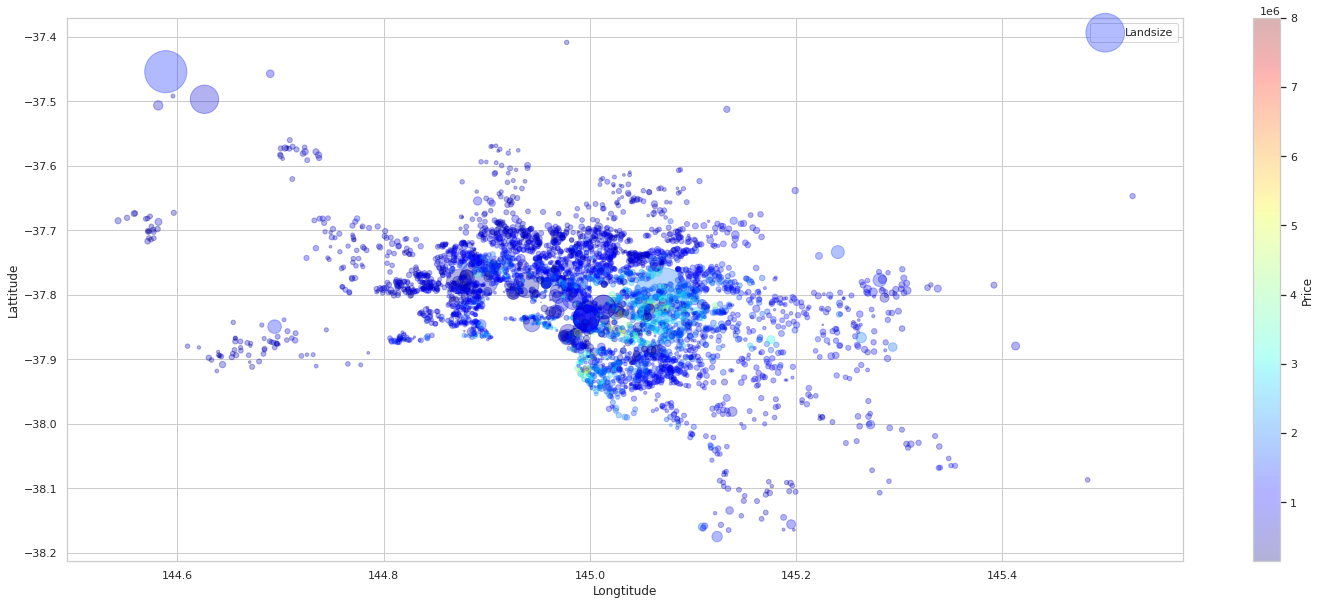

In [12]:
train_set.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=0.3,
             s=train_set["Landsize"]/25, label="Landsize", 
             figsize=(25,10),
             c="Price", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
plt.show()

There is obviusly a correlation between the position (Latitude and Longitude), and price, as we see certain areas tend to have higher prices, while others have lower. However, this correlation is not linear.

#### Correlation study

In [13]:
corr_mat = train_set.corr()
corr_mat["Price"].sort_values(ascending=False)



Price            1.000000
Rooms            0.494941
Bedroom2         0.460544
Bathroom         0.459137
Car              0.227902
Longtitude       0.199303
BuildingArea     0.061963
Landsize         0.048182
Propertycount   -0.038241
Distance        -0.167654
Lattitude       -0.206769
YearBuilt       -0.352157
Name: Price, dtype: float64

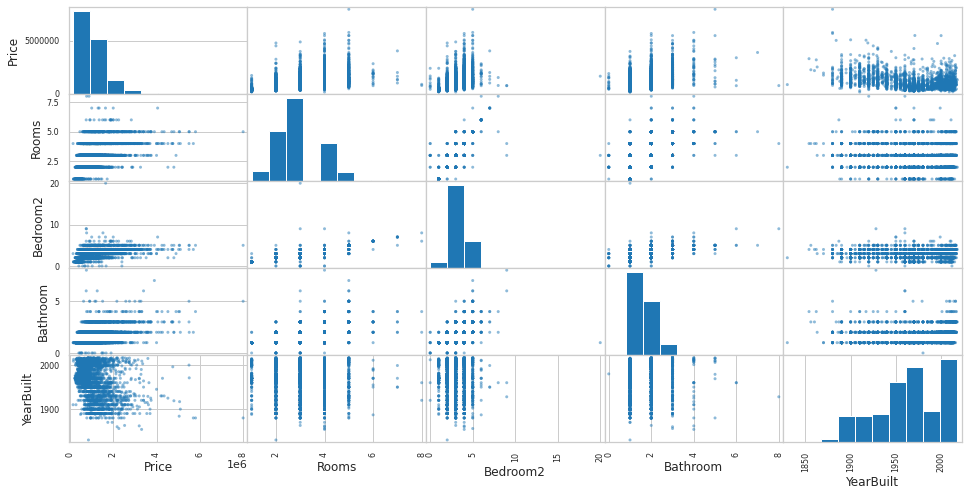

In [14]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["Price", "Rooms", "Bedroom2","Bathroom",
              "YearBuilt"]
scatter_matrix(train_set[attributes], figsize=(16, 8))
plt.show()

Some numerical features have clear linear correlation with the price, as the number of rooms, bedrooms... Others may have other kind of correlation (as seen with the Lattitude and Longitude features), or we cannot see it now because the data is not clean.

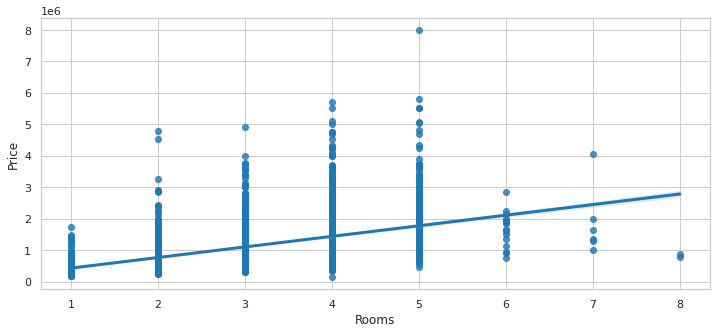

In [15]:
#Rooms vs Price
sns.regplot(data=train_set, x="Rooms", y="Price")
plt.show()

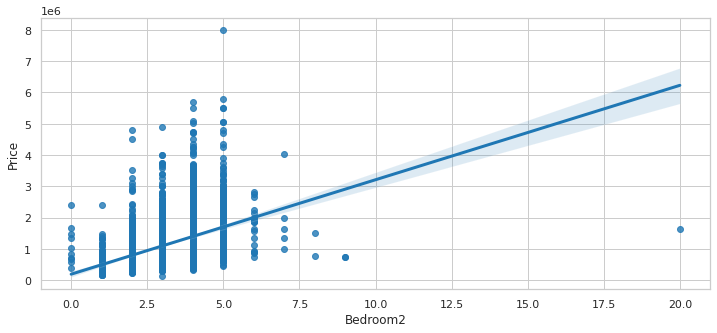

In [16]:
#Bedroom2 vs Price
sns.regplot(data=train_set, x="Bedroom2", y="Price")
plt.show()

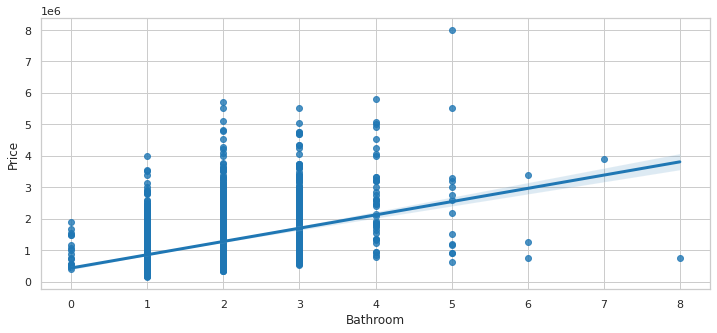

In [17]:
#BathRoom vs Price
sns.regplot(data=train_set, x="Bathroom", y="Price")
plt.show()

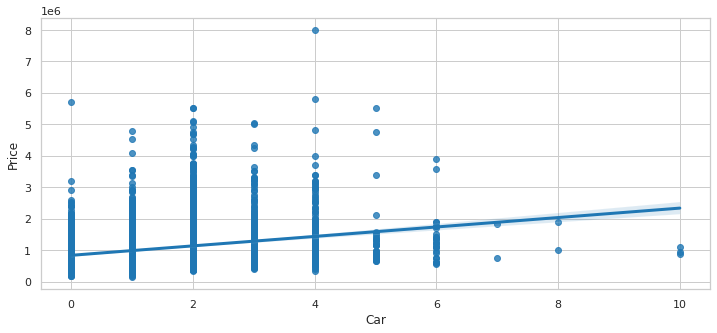

In [18]:
#Car vs Price
sns.regplot(data=train_set, x="Car", y="Price")
plt.show()

In [19]:
# Type value, even that it is indeed categorical, has influence on the price, as we see that 
# the mean price changes between categories
train_set[["Type", "Price"]].groupby("Type").describe()

Price                                                              \
       count          mean            std       min       25%        50%   
Type                                                                       
h     3765.0  1.244751e+06  679481.019261  145000.0  792000.0  1070000.0   
t      476.0  9.606894e+05  405810.931330  310000.0  680000.0   865000.0   
u     1191.0  5.998921e+05  250037.727958  160000.0  434500.0   560000.0   

                            
            75%        max  
Type                        
h     1500000.0  8000000.0  
t     1135500.0  3275000.0  
u      700000.0  2120000.0

In [20]:
#On the other hand, looks like Method does not influence the price in any way
train_set[["Method", "Price"]].groupby("Method").describe()

Price                                                             \
         count          mean            std       min       25%       50%   
Method                                                                      
PI       648.0  1.134799e+06  715764.216291  145000.0  650000.0  950000.0   
S       3597.0  1.080985e+06  610468.255458  216000.0  676000.0  918000.0   
SA        36.0  1.066667e+06  515437.373222  360000.0  659875.0  937500.0   
SP       668.0  9.225327e+05  508077.520178  245000.0  575000.0  800000.5   
VB       483.0  1.200704e+06  905612.926784  160000.0  570000.0  900000.0   

                              
              75%        max  
Method                        
PI      1450000.0  5800000.0  
S       1325000.0  5700000.0  
SA      1309375.0  2725000.0  
SP      1132375.0  3600000.0  
VB      1600000.0  8000000.0

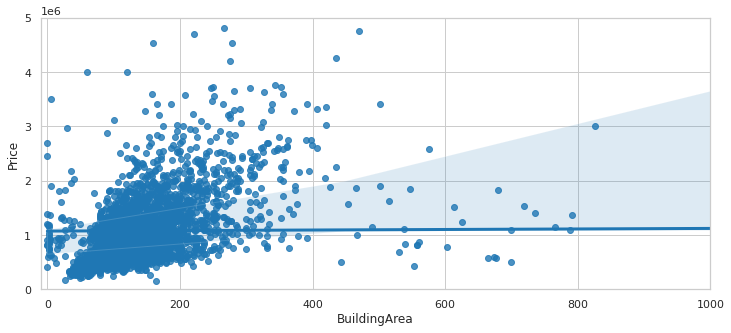

In [21]:
#BuildingArea vs Price
sns.regplot(data=train_set, x="BuildingArea", y="Price")
plt.axis([-10, 1000, 0, 5e6])
plt.show()

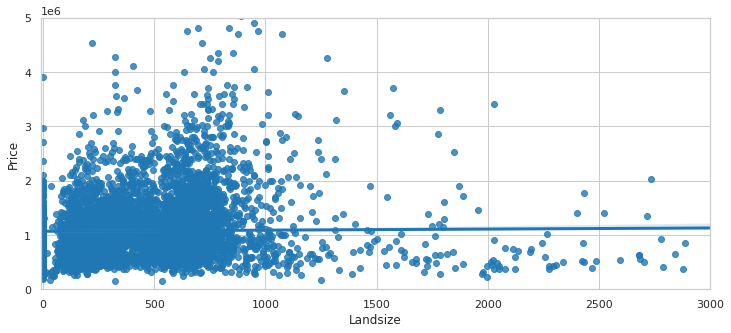

In [22]:
#LandSize vs Price
sns.regplot(data=train_set, x="Landsize", y="Price")
plt.axis([-10, 3000, 0, 5e6])
plt.show()

Building area seem to have a lot of faulty data,that makes this features seem to be not useful for our predictions. Maybe if we filter this data in some way we can make it useful in the future.

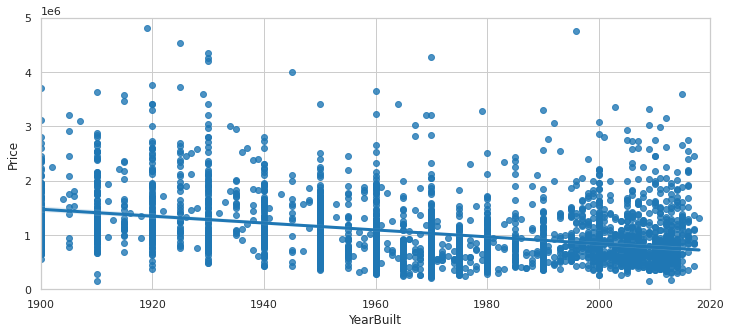

In [23]:
#Price vs YearBuilt
sns.regplot(data=train_set, x="YearBuilt", y="Price")
plt.axis([1900, 2020, 0, 5e6])
plt.show()

YearBuilt data seems really suspicious. Older houses have higher prices, which does not make a lot of sense, as we would expect newer houses to be more expensive. We also have a lot of nans and faulty data, so for now I think the best decision is to not use YearBuilt feature.

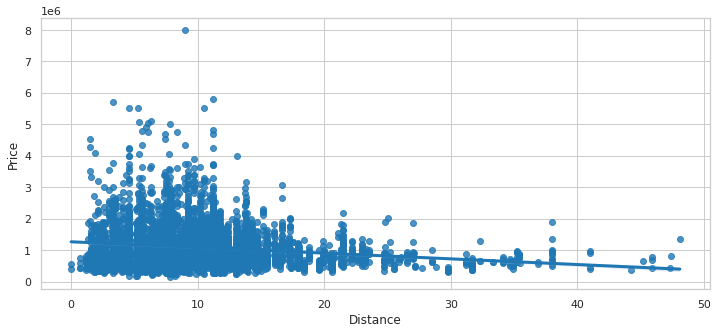

In [24]:
#Price vs Distance
sns.regplot(data=train_set, x="Distance", y="Price")
plt.show()

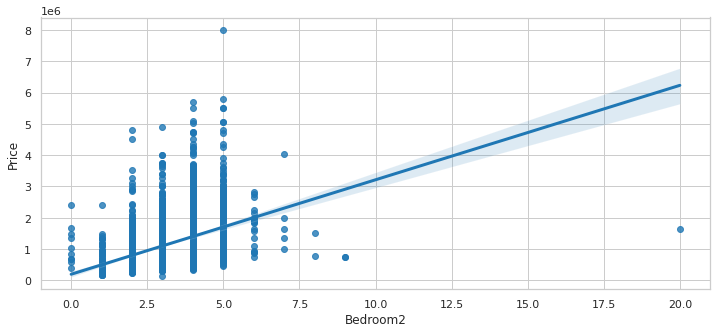

In [25]:
#Price vs Bedroom2
sns.regplot(data=train_set, x="Bedroom2", y="Price")
plt.show()

Bedroom2 is interesting. By its name it seems that it indicates the number of Bedrooms, but the feature Rooms does it too! In most of the cases the number of Rooms and Bedrooms2 seems to be the same, but there are clearly some differences, as we see that the maximum number of beedrooms is 20, while the number of Rooms is 8. Both categories seem to give the same info, with subtile differences. The problem here is: would not be a mistake to train this model using Rooms and Bedrooms2?
Here we would maybe give more importance to this repeated category, as we are puting it two times. A wise aproach may be to not use one of this categories in the final model

### Data transformation

#### Categorical feautures

First we will one-hot encode the Type feature, as we have seen that it might help the predictions.

In [26]:
housing_cat = train_set[["Type"]]
# There is missing values in this category, we will create a new cateogry for those.
housing_cat.fillna('Unknown').head(10)

,Type
index,
0,h
1,h
2,h
3,h
4,h
5,u
6,h
7,u
8,h


In [27]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')
housing_cat_1hot = cat_encoder.fit_transform(housing_cat.fillna('Unknown'))
housing_cat_1hot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [28]:
cat_encoder.categories_

[array(['h', 't', 'u'], dtype=object)]

### Transformation Pipeline

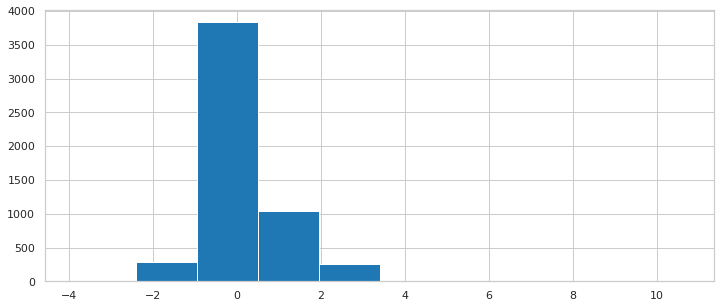

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
#gaussian scaler
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer
#imputer based on Knn model
from sklearn.impute import KNNImputer



## create a function to replace 0 by NaN
def replace_0_2_NaN(data):
    data[data == 0] = np.nan
    return data


num0_pipeline = Pipeline([
        ('knn_imputer', KNNImputer(n_neighbors=5)),
        ('gauss_trans', PowerTransformer()),
    ])

housing_num_tr = num0_pipeline.fit_transform(train_set[['Bedroom2']])
plt.hist(housing_num_tr,bins=10)
plt.show()

In [30]:
num1_pipeline = Pipeline([
        ('zeros2NaN',FunctionTransformer(func = replace_0_2_NaN,validate=False)),
        ('imputer', SimpleImputer(strategy="median")),
        #('log',FunctionTransformer(np.log1p, validate=True)),
        ('gauss_trans', PowerTransformer()),
    ])

In [31]:
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="constant",fill_value='Unknown')),
        ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore')),
    ])
train_set.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,NaN,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,NaN,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,NaN,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0


In [32]:
from sklearn.compose import ColumnTransformer

num_attribs0 = ['Bedroom2','Bathroom','Distance','Car','Lattitude','Longtitude','Landsize']
num_attribs1 = ['BuildingArea','Landsize']
cat_attribs = ['Type','Postcode','Regionname','Suburb']


full_pipeline = ColumnTransformer([
        ("num0", num0_pipeline, num_attribs0),
        ("num1", num1_pipeline, num_attribs1),
        ("cat", cat_pipeline, cat_attribs),
    ])

housing_labels = train_set['Price'].copy()
train_set = train_set.drop("Price", axis=1) # drop labels for training set
housing_prepared = full_pipeline.fit_transform(train_set)

print(*housing_prepared[:10])

  (0, 0)	1.0979361828730374
  (0, 1)	0.8626788321285402
  (0, 2)	-0.32137053498262286
  (0, 3)	0.5061340704132641
  (0, 4)	0.6677973273333714
  (0, 5)	-0.8558312709352839
  (0, 6)	0.7338048187139251
  (0, 7)	-0.002712145279280182
  (0, 8)	0.7657547271871457
  (0, 9)	1.0
  (0, 42)	1.0
  (0, 205)	1.0
  (0, 208)	1.0   (0, 0)	-0.9330137724359698
  (0, 1)	-0.8056686696345994
  (0, 2)	-0.8109150649756496
  (0, 3)	-0.5913798359704003
  (0, 4)	0.40719349227644597
  (0, 5)	-0.05413833880510874
  (0, 6)	-0.3601278428755186
  (0, 7)	-0.002712145279280182
  (0, 8)	-1.2426875064342522
  (0, 9)	1.0
  (0, 67)	1.0
  (0, 201)	1.0
  (0, 413)	1.0   (0, 0)	0.14550084548430842
  (0, 1)	-0.8056686696345994
  (0, 2)	0.024664980473669055
  (0, 3)	2.064068000339304
  (0, 4)	0.16287739691057837
  (0, 5)	0.6861602395809453
  (0, 6)	0.513340785313556
  (0, 7)	-0.1887927587319277
  (0, 8)	0.4221299358790598
  (0, 9)	1.0
  (0, 91)	1.0
  (0, 204)	1.0
  (0, 228)	1.0   (0, 0)	0.14550084548430842
  (0, 1)	-0.8056686696

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2960: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


### Select and train a model

Now we will use diferents models and see their behaviors, in order to choose the best one with the better parameters.

##### Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [34]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print('Linear regression RMSE: ',lin_rmse)

from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
print('Linear regression MAE: ',lin_mae)


Linear regression RMSE:  359253.666763622
Linear regression MAE:  230036.25686597443


##### KNN

In [35]:
## K-Nearest Neighbour
from sklearn import neighbors

n_neighbors = 3
knn_reg = neighbors.KNeighborsRegressor(n_neighbors)
knn_reg.fit(housing_prepared, housing_labels)

KNeighborsRegressor(n_neighbors=3)

In [36]:
housing_predictions = knn_reg.predict(housing_prepared)
knn_mse = mean_squared_error(housing_labels, housing_predictions)
knn_rmse = np.sqrt(knn_mse)
knn_rmse

233659.02738689978

##### Decision Tree Regressor

In [37]:
## Decision Tree
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [38]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

3917.7313472912297

##### Random Forest Regressor

In [39]:
## Let's try another model: Random Forest
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=20, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(n_estimators=20, random_state=42)

In [40]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

120688.84937395045

##### SVM Regressor

In [41]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

666672.4372092155

### Models comparison

As our models are not very costly to train, we can afford to train it may times with different parameters and see how the scores change. We do not need to have an unique train-validation split, as we can do many (cross validation), and see the mean score obtained.

In [42]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_root_mean_squared_error", cv=10)
print("RSME cross validation score for TREE REGRESSOR: ",-scores.mean())

RSME cross validation score for TREE REGRESSOR:  405688.4114790089


We can do that for each model and with different parameters to test our models.

In [43]:
def display_scores(scores,model_name = None):
    if(model_name):
        print("----",model_name,"----")
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [44]:
models = [(lin_reg,"LINEAR REGRESSOR"),
          (tree_reg,"DECISION TREE"),
          (knn_reg,"KNN-REGRESSOR"),
          (forest_reg,'RANDOM FOREST'),
          (svm_reg,'SVM REGRESSOR')]
for model in models:
    scores = cross_val_score(model[0], housing_prepared, housing_labels, scoring="neg_root_mean_squared_error", cv=10)
    display_scores(-scores, model[1])

---- LINEAR REGRESSOR ----
Mean: 374848.5392711284
Standard deviation: 31699.90365276404
---- DECISION TREE ----
Mean: 405688.4114790089
Standard deviation: 37112.3614296334
---- KNN-REGRESSOR ----
Mean: 341241.4395920831
Standard deviation: 26472.842215108067
---- RANDOM FOREST ----
Mean: 303692.89735150686
Standard deviation: 29943.551269900505
---- SVM REGRESSOR ----
Mean: 665565.8452643153
Standard deviation: 43737.50678140671


For now, random forest seems to be the best model. However, this could change as this models have several parameters, and may behave better if they are changed. Also, if we add more features to the model, we could see that other prediction method has better scores.

#### Tuning the paramaters
Our models have several parameters, which may change the results. In order to find good parameters we should perform a gridSearch.

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8], 'max_depth':[3,5,7,10]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42,n_jobs= 100)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_root_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=100, random_state=42),
             param_grid=[{'max_depth': [3, 5, 7, 10],
                          'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [46]:
print("the best parameters are:")
print(grid_search.best_params_)

the best parameters are:
{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


In [47]:
print("Best Score")
print(-grid_search.best_score_)

Best Score
313249.72546031687


In [48]:
print("the best trained model:")
print(grid_search.best_estimator_)

the best trained model:
RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=10,
                      n_jobs=100, random_state=42)


In [49]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score, params)

630858.8369488902 {'max_depth': 3, 'max_features': 2, 'n_estimators': 3}
635705.6715394079 {'max_depth': 3, 'max_features': 2, 'n_estimators': 10}
637826.5075892603 {'max_depth': 3, 'max_features': 2, 'n_estimators': 30}
622502.2378168396 {'max_depth': 3, 'max_features': 4, 'n_estimators': 3}
632220.3505856971 {'max_depth': 3, 'max_features': 4, 'n_estimators': 10}
629893.1679495287 {'max_depth': 3, 'max_features': 4, 'n_estimators': 30}
611194.5039594786 {'max_depth': 3, 'max_features': 6, 'n_estimators': 3}
615323.4631103568 {'max_depth': 3, 'max_features': 6, 'n_estimators': 10}
614164.5299169181 {'max_depth': 3, 'max_features': 6, 'n_estimators': 30}
610747.9028898265 {'max_depth': 3, 'max_features': 8, 'n_estimators': 3}
602388.0579762197 {'max_depth': 3, 'max_features': 8, 'n_estimators': 10}
608643.2014489055 {'max_depth': 3, 'max_features': 8, 'n_estimators': 30}
622879.1821478109 {'max_depth': 5, 'max_features': 2, 'n_estimators': 3}
624709.7260734336 {'max_depth': 5, 'max_fea

After a first aproximation, we now we search deeply to find the best parameters.

#### max_features

In [50]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=42,n_estimators=10,n_jobs= 100),
                  param_grid={'max_features': range(2, 500, 10)},
                  scoring='neg_root_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)
results = grid_search.cv_results_

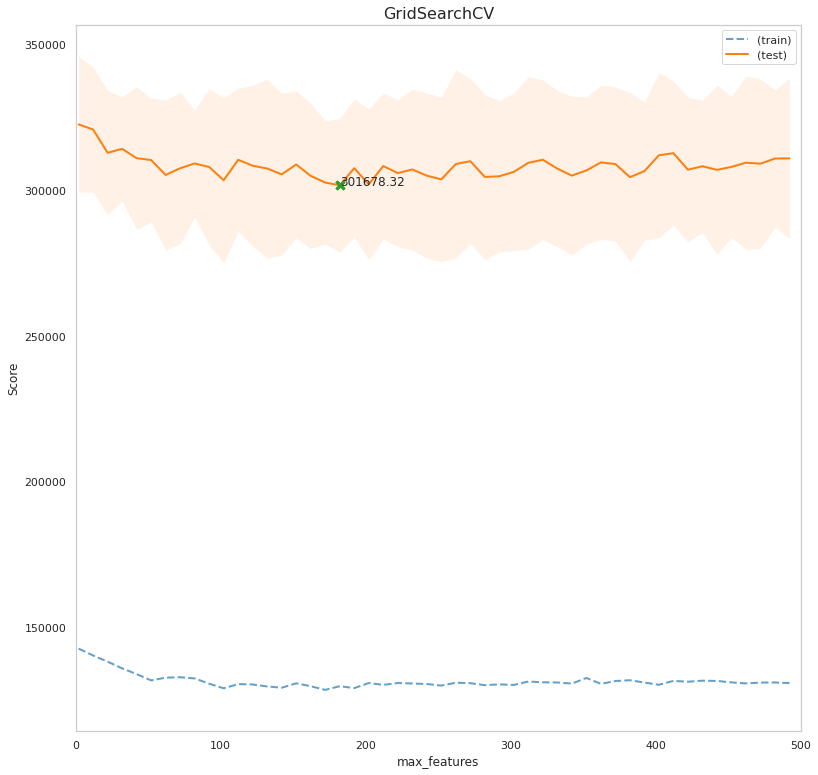

In [51]:
#plot the results
plt.figure(figsize=(13, 13))
plt.title("GridSearchCV",
          fontsize=16)

plt.xlabel("max_features")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, 500)


# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_max_features'].data, dtype=float)


for sample, style in (('train', '--'), ('test', '-')):
    sample_score_mean = (-results['mean_%s_score' % (sample)])
    sample_score_std = (results['std_%s_score' % (sample)])
    ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                    sample_score_mean + sample_score_std,
                    alpha=0.1 if sample == 'test' else 0)
    ax.plot(X_axis, sample_score_mean, style,
            alpha=1 if sample == 'test' else 0.7,
            label="(%s)" % ( sample))

best_index = np.nonzero(results['rank_test_score' ] == 1)[0][0]
best_score =  (-results['mean_test_score' ][best_index])

# Plot a dotted vertical line at the best score for that scorer marked by x
ax.plot([X_axis[best_index], ] * 2, [best_score, best_score],
        linestyle='-.',  marker='x', markeredgewidth=3, ms=8)

# Annotate the best score for that scorer
ax.annotate("%0.2f" % best_score,
            (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()

In [52]:
print('BEST GRID SEARCH MODEL PARAMETERS: ',grid_search.best_estimator_)
print('RSME: ',-grid_search.best_score_)

BEST GRID SEARCH MODEL PARAMETERS:  RandomForestRegressor(max_features=182, n_estimators=10, n_jobs=100,
                      random_state=42)
RSME:  301678.3171331451


With this combination of parameters we find the local best parameter of max_features. It is possible that later we have to refine and tune again this parameter to find a better combination of parameters, that gives us a better score.

#### n_estimators

In [53]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=42,max_depth=None,max_features = 182,n_jobs= 100,bootstrap=False),
                  param_grid={'n_estimators': [2,20,100,150,200,300]},
                  scoring='neg_root_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)
results = grid_search.cv_results_

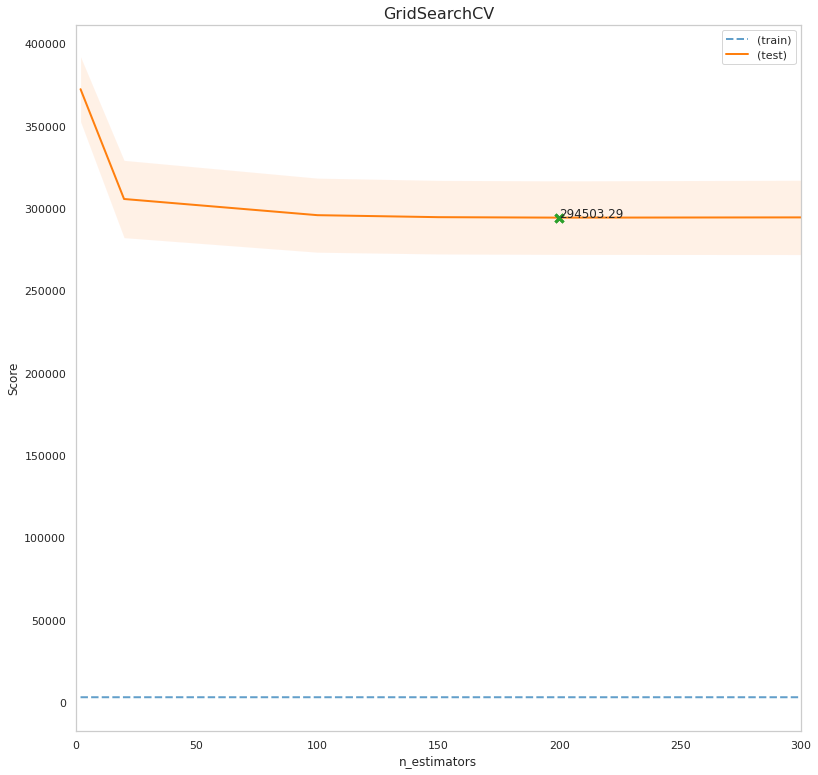

In [54]:
#plot the results
plt.figure(figsize=(13, 13))
plt.title("GridSearchCV",
          fontsize=16)

plt.xlabel("n_estimators")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0,300)


# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_n_estimators'].data, dtype=float)


for sample, style in (('train', '--'), ('test', '-')):
    sample_score_mean = (-results['mean_%s_score' % (sample)])
    sample_score_std = (results['std_%s_score' % (sample)])
    ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                    sample_score_mean + sample_score_std,
                    alpha=0.1 if sample == 'test' else 0)
    ax.plot(X_axis, sample_score_mean, style,
            alpha=1 if sample == 'test' else 0.7,
            label="(%s)" % ( sample))

best_index = np.nonzero(results['rank_test_score' ] == 1)[0][0]
best_score =  (-results['mean_test_score' ][best_index])

# Plot a dotted vertical line at the best score for that scorer marked by x
ax.plot([X_axis[best_index], ] * 2, [best_score, best_score],
        linestyle='-.',  marker='x', markeredgewidth=3, ms=8)

# Annotate the best score for that scorer
ax.annotate("%0.2f" % best_score,
            (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()

In [55]:
print('BEST GRID SEARCH MODEL PARAMETERS: ',grid_search.best_estimator_)
print('RSME: ',-grid_search.best_score_)

BEST GRID SEARCH MODEL PARAMETERS:  RandomForestRegressor(bootstrap=False, max_features=182, n_estimators=200,
                      n_jobs=100, random_state=42)
RSME:  294503.2916132774


Now we combine the two above and try to extract the best model

In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    #2x4x3
    #{'bootstrap': [False,True], 'n_estimators': [200,350,500], 'max_features': [120,192,240]},
    {'bootstrap': [True], 'n_estimators': [200,350,500], 'max_features': [120,182,240]},
  ]

forest_reg = RandomForestRegressor(random_state=42,n_jobs= 100)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_root_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=100, random_state=42),
             param_grid=[{'bootstrap': [True], 'max_features': [120, 182, 240],
                          'n_estimators': [200, 350, 500]}],
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [57]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score, params)

288349.2404257484 {'bootstrap': True, 'max_features': 120, 'n_estimators': 200}
287989.78248211124 {'bootstrap': True, 'max_features': 120, 'n_estimators': 350}
287731.7476241529 {'bootstrap': True, 'max_features': 120, 'n_estimators': 500}
289177.6659521876 {'bootstrap': True, 'max_features': 182, 'n_estimators': 200}
289308.34794768307 {'bootstrap': True, 'max_features': 182, 'n_estimators': 350}
288662.9066900725 {'bootstrap': True, 'max_features': 182, 'n_estimators': 500}
289913.7162000952 {'bootstrap': True, 'max_features': 240, 'n_estimators': 200}
289583.4590219956 {'bootstrap': True, 'max_features': 240, 'n_estimators': 350}
289389.72496442567 {'bootstrap': True, 'max_features': 240, 'n_estimators': 500}


In [58]:
print("Best Score")
print(-grid_search.best_score_)

Best Score
287731.7476241529


In [59]:
print("the best trained model:")
print(grid_search.best_estimator_)
final_model = grid_search.best_estimator_

the best trained model:
RandomForestRegressor(max_features=120, n_estimators=500, n_jobs=100,
                      random_state=42)


### Testing our model

In this case, we have used all the data available in the train set to train our models, and we have used cross validation to test their permormance. We have not split the training set into train and test, because we already have a test set, the kaggle one.
So now, using all the info obtained with our validation methods, and after tuning the model, we can generate the kaggle submission and see how it performs in the test set.

##### Kaggle submission

In [60]:
#Grid search above takes a lot to run sometimes, when tring a lot of paramaters, that is why I put them manually
final_model = RandomForestRegressor(max_features=120, n_estimators=500, n_jobs=100,
                      random_state=42)
final_model.fit(housing_prepared, housing_labels)
X_test_prepared = full_pipeline.transform(test_set)
y_pred = final_model.predict(X_test_prepared)

df_output = pd.DataFrame(y_pred)
df_output = df_output.reset_index()
df_output.columns = ['index','Price']

df_output.to_csv('kaggle287731.7476241529.csv',index=False)

In [61]:
scores = cross_val_score(final_model, housing_prepared, housing_labels, scoring="neg_root_mean_squared_error", cv=10)
print("Expected Kaggle score with cross validation:", -scores.mean())
print("Standard deviation:", scores.std())
confidence = 2*(scores.std())
print("95% confidence interval: [",-scores.mean()-confidence,',',-scores.mean()+confidence,"]")

Expected Kaggle score with cross validation: 283898.130549208
Standard deviation: 28837.005087883932
95% confidence interval: [ 226224.12037344015 , 341572.1407249759 ]
